In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# load rankings data here:

wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
roller_coasters = pd.read_csv('roller_coasters.csv')
print(wood.head(5))
print(steel.head(5))


   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

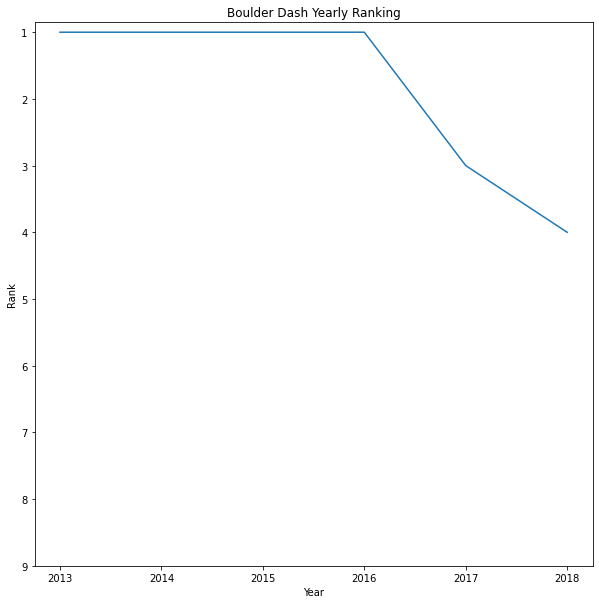

<Figure size 432x288 with 0 Axes>

In [3]:
# write function to plot rankings over time for 1 roller coaster here:

def plot_ranking(coaster_name, park_name, df):
    plt.subplots(figsize=(10,10))
    coaster_ranking = df[(df['Name'] == coaster_name) & (df['Park'] == park_name)]
    plt.plot(coaster_ranking['Year of Rank'], coaster_ranking['Rank'])
    plt.gca().invert_yaxis()
    plt.gca().set_yticks(range(1, 10))
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(coaster_name +' Yearly Ranking')
plot_ranking('Boulder Dash', 'Lake Compounce', wood)
plt.show()

plt.clf()

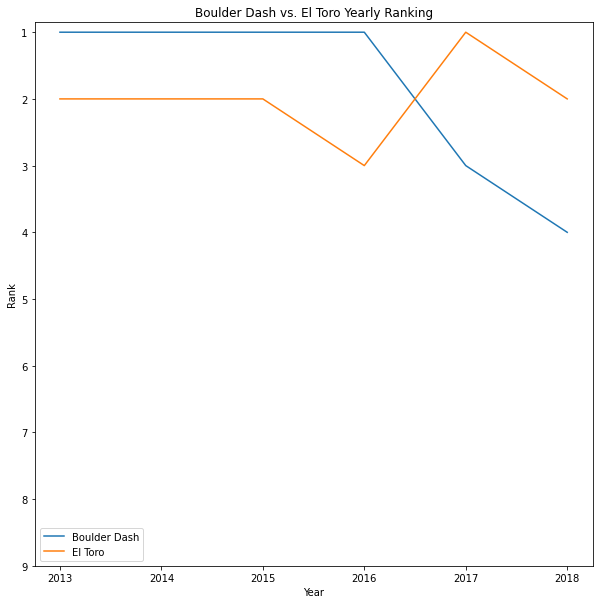

<Figure size 432x288 with 0 Axes>

In [4]:
# write function to plot rankings over time for 2 roller coasters here:
def multi_plot_ranking(coaster_name_1, park_name_1, df_1, coaster_name_2, park_name_2, df_2):
    plt.subplots(figsize=(10,10))
    coaster_ranking_1 = df_1[(df_1['Name'] == coaster_name_1) & (df_1['Park'] == park_name_1)]
    coaster_ranking_2 = df_2[(df_2['Name'] == coaster_name_2) & (df_2['Park'] == park_name_2)]
    plt.plot(coaster_ranking_1['Year of Rank'], coaster_ranking_1['Rank'])
    plt.plot(coaster_ranking_2['Year of Rank'], coaster_ranking_2['Rank'])
    plt.gca().invert_yaxis()
    plt.gca().set_yticks(range(1, 10))
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.legend([coaster_name_1, coaster_name_2])
    plt.title(coaster_name_1 + ' vs. ' + coaster_name_2 +' Yearly Ranking')
multi_plot_ranking('Boulder Dash', 'Lake Compounce', wood, 'El Toro', 'Six Flags Great Adventure', wood)
plt.show()

plt.clf()

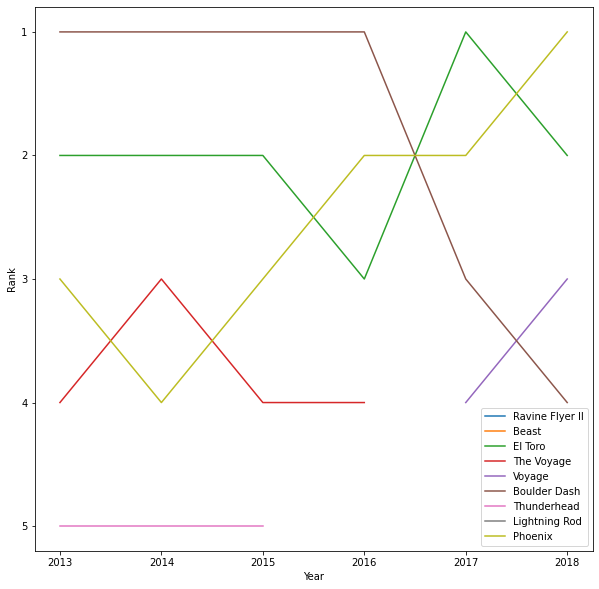

<Figure size 432x288 with 0 Axes>

In [5]:
# write function to plot top n rankings over time here:

def n_ranked(n, df):
    top_n_rankings = df[df['Rank'] <= n]
    plt.subplots(figsize=(10,10))
    for coaster in set(top_n_rankings['Name']):
        coaster_ranking = top_n_rankings[top_n_rankings['Name'] == coaster]
        plt.plot(coaster_ranking['Year of Rank'], coaster_ranking['Rank'], label=coaster)
    plt.gca().invert_yaxis()
    plt.gca().set_yticks([i for i in range(1, n + 1)])
    plt.xlabel('Year')
    plt.legend(loc=4)
    plt.ylabel('Rank')
n_ranked(5, wood)
plt.show()
plt.clf()


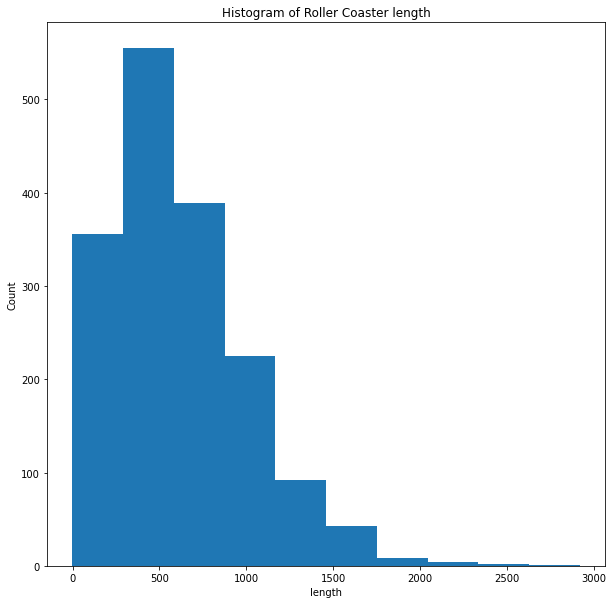

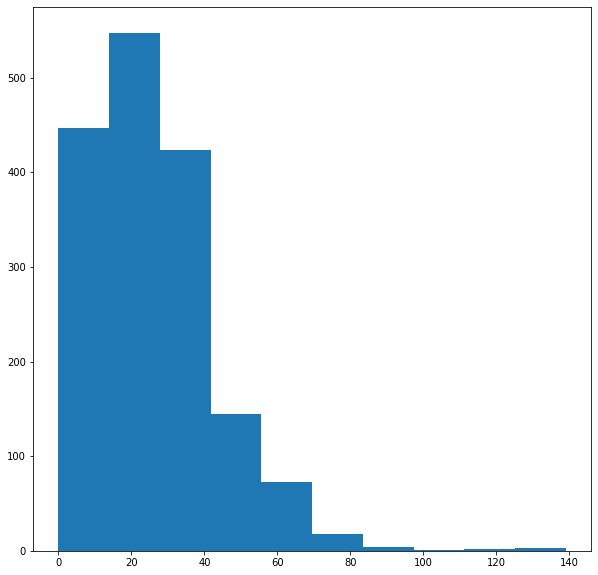

<Figure size 432x288 with 0 Axes>

In [6]:
# load roller coaster data here:

coaster_df = pd.read_csv('roller_coasters.csv')

# write function to plot histogram of column values here:


heights = coaster_df[coaster_df['height'] <= 140]

def hist_plot(df, column):
    plt.subplots(figsize=(10,10))
    plt.hist(df[column].dropna())
    plt.title('Histogram of Roller Coaster {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Count')
hist_plot(coaster_df, 'length')
plt.show()

plt.subplots(figsize=(10,10))
plt.hist(heights['height'])
plt.show()

plt.clf()

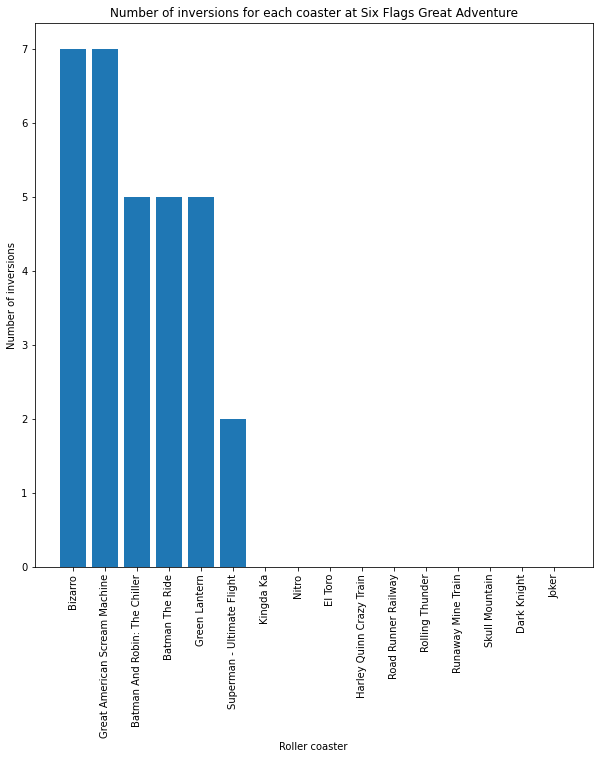

<Figure size 432x288 with 0 Axes>

In [7]:
# write function to plot inversions by coaster at a park here:

def inversion_bar_chart(df, park_name):
    plt.subplots(figsize=(10,10))
    park_coasters = df[df['park'] == park_name]
    park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
    coaster_names = park_coasters['name']
    inversion_number = park_coasters['num_inversions']
    plt.bar(range(len(inversion_number)), inversion_number)
    plt.gca().set_xticks(range(len(coaster_names)))
    plt.gca().set_xticklabels(coaster_names, rotation=90)
    plt.title('Number of inversions for each coaster at ' + park_name)
    plt.xlabel('Roller coaster')
    plt.ylabel('Number of inversions')
inversion_bar_chart(coaster_df, 'Six Flags Great Adventure')
plt.show()


plt.clf()

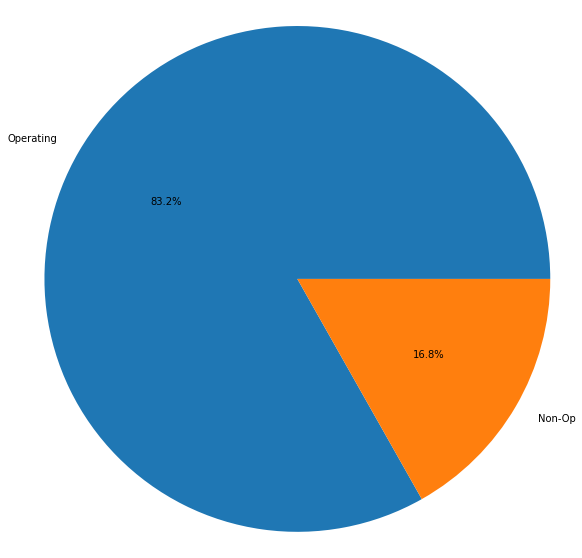

<Figure size 432x288 with 0 Axes>

In [8]:
# write function to plot pie chart of operating status here:

def status_pie(df):
    plt.subplots(figsize=(10,10))
    operating = df[df['status'] == 'status.operating']
    non_operating = df[df['status'] == 'status.closed.definitely']
    status_count = [len(operating), len(non_operating)]
    plt.pie(status_count, autopct='%0.1f%%', labels=['Operating', 'Non-Op'])
    plt.axis('equal')
status_pie(coaster_df)
plt.show()

plt.clf()

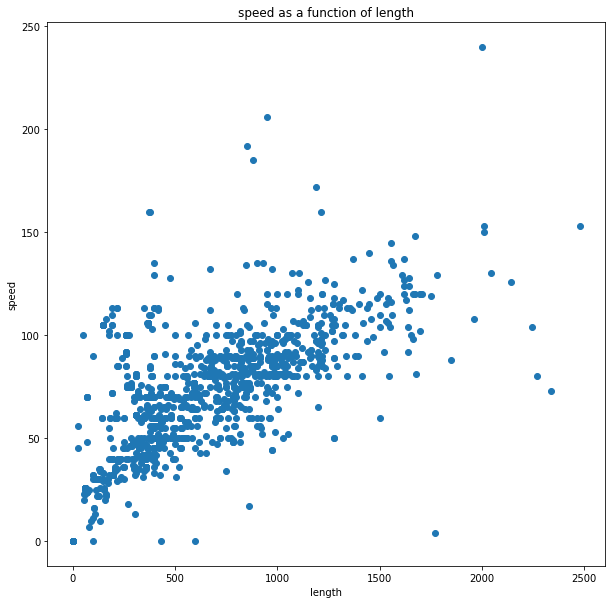

<Figure size 432x288 with 0 Axes>

In [9]:
# write function to create scatter plot of any two numeric columns here:

coaster_df = coaster_df[coaster_df['height'] < 140]
                        
def scatter(df, col_1, col_2):
    plt.subplots(figsize=(10,10))
    column_1 = df[col_1]
    column_2 = df[col_2]
    plt.scatter(column_1, column_2)
    plt.xlabel(col_1)
    plt.ylabel(col_2)
    plt.title(col_2 + " as a function of " + col_1)
scatter(coaster_df, 'length', 'speed')
    
plt.show()

plt.clf()

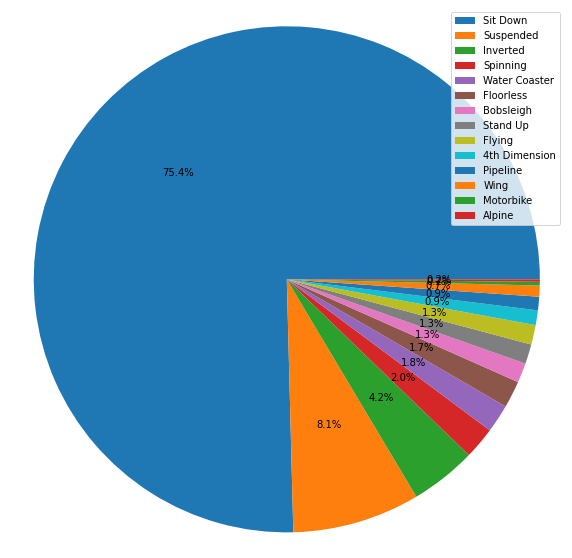

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot to show the popularity of seating types
coaster_df = coaster_df.dropna()
def seating_pie(df):
    seating_types = df['seating_type'].unique()
    plt.subplots(figsize=(10,10))
    seating_numbers = df['seating_type'].value_counts().tolist()
    plt.pie(seating_numbers, autopct='%0.1f%%')
    plt.axis('equal')
    plt.legend(seating_types, loc='best')
seating_pie(coaster_df)
plt.show()
plt.clf()

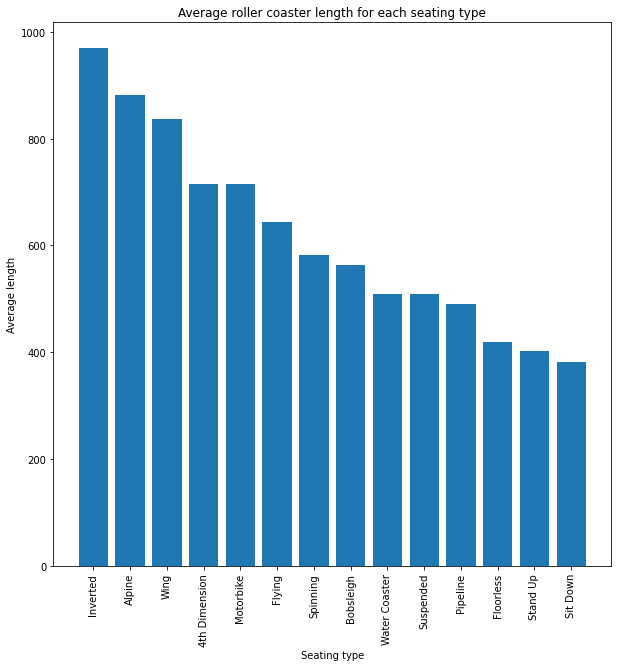

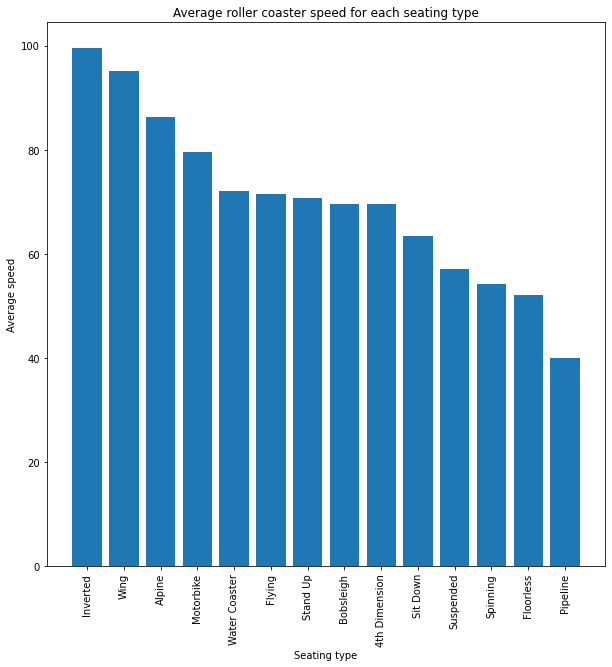

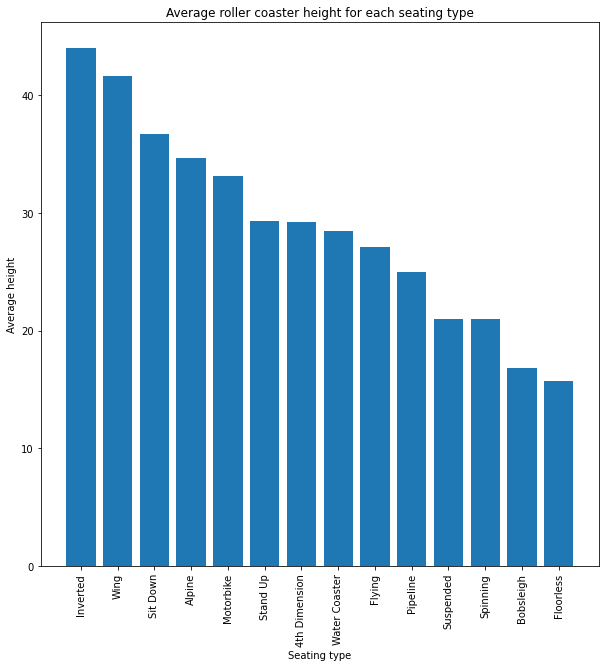

<Figure size 432x288 with 0 Axes>

In [11]:
# The user can change the 'column' to see how different variables change based on seating type
coaster_df = coaster_df.dropna()
def seating_bar_chart(df, column):
    plt.subplots(figsize=(10,10))
    seating_types = df['seating_type'].unique()
    mean_list = []
    for seat_type in set(seating_types):
        list_for_mean = df.loc[df['seating_type'] == seat_type, column]
        seat_mean = list_for_mean.mean()
        mean_list.append(seat_mean)
    new_data = zip(seating_types, mean_list)
    new_df = pd.DataFrame(new_data, columns = ['seating_type', 'average_' + column])
    sorted_new_df = new_df.sort_values('average_' + column, ascending=False)
    sorted_x = sorted_new_df['seating_type']
    sorted_y = sorted_new_df['average_' + column]
    plt.bar(range(len(sorted_x)), sorted_y)
    plt.gca().set_xticks(range(len(sorted_x)))
    plt.gca().set_xticklabels(sorted_x, rotation=90)
    plt.title('Average roller coaster ' + column + ' for each seating type')
    plt.xlabel('Seating type')
    plt.ylabel('Average ' + column)

    
# Change the factor you'd like to evaluate in the row below - height, length or speed
seating_bar_chart(coaster_df, 'length')
seating_bar_chart(coaster_df, 'speed')
seating_bar_chart(coaster_df, 'height')
plt.show()
plt.clf()

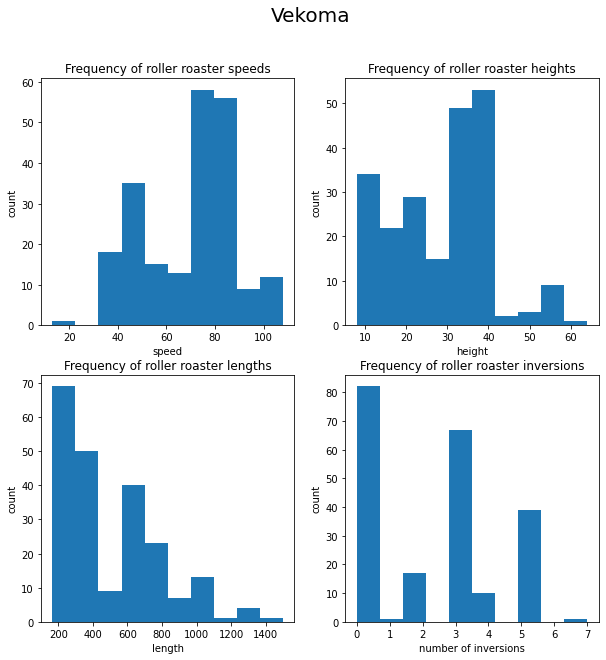

<Figure size 432x288 with 0 Axes>

In [12]:
# Plots to investigate what a specific manufacturer focuses on when building a roller coaster

def hist_plot(df, manufacturer_name):
    plt.subplots(figsize=(10,10))
    plt.suptitle(manufacturer_name, fontsize=20)
    manufacturer_data = df[df['manufacturer'] == manufacturer_name]
    plt.subplot(2, 2, 1)
    plt.hist(manufacturer_data['speed'].dropna())
    plt.xlabel('speed')
    plt.ylabel('count')
    plt.title('Frequency of roller roaster speeds')
    plt.subplot(2, 2, 2)
    plt.hist(manufacturer_data['height'].dropna())
    plt.xlabel('height')
    plt.ylabel('count')
    plt.title('Frequency of roller roaster heights')
    plt.subplot(2, 2, 3)
    plt.hist(manufacturer_data['length'].dropna())
    plt.xlabel('length')
    plt.ylabel('count')
    plt.title('Frequency of roller roaster lengths')
    plt.subplot(2, 2, 4)
    plt.hist(manufacturer_data['num_inversions'].dropna())
    plt.xlabel('number of inversions')
    plt.ylabel('count')
    plt.title('Frequency of roller roaster inversions')
hist_plot(coaster_df, 'Vekoma')
plt.show()
plt.clf()

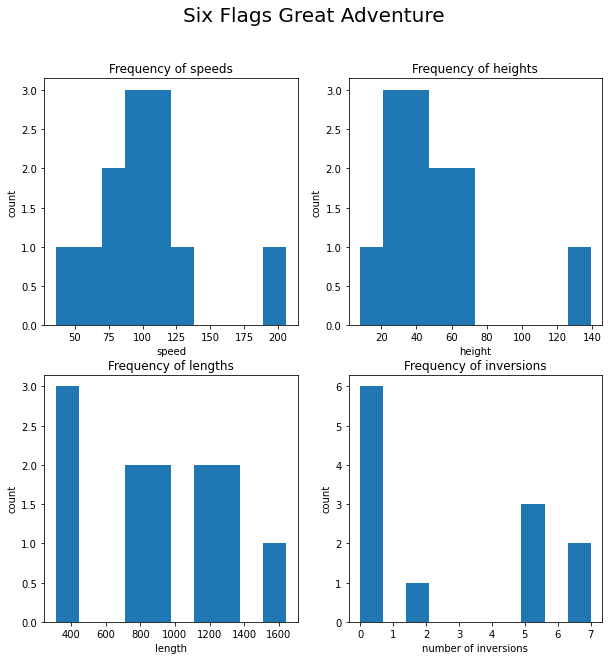

<Figure size 432x288 with 0 Axes>

In [13]:
# Plots to investigate what/if a specific park has a specialty

def hist_plot(df, park_name):
    plt.subplots(figsize=(10,10))
    plt.suptitle(park_name, fontsize=20)
    park_data = df[df['park'] == park_name]
    plt.subplot(2, 2, 1)
    plt.hist(park_data['speed'].dropna())
    plt.xlabel('speed')
    plt.ylabel('count')
    plt.title('Frequency of speeds')
    plt.subplot(2, 2, 2)
    plt.hist(park_data['height'].dropna())
    plt.xlabel('height')
    plt.ylabel('count')
    plt.title('Frequency of heights')
    plt.subplot(2, 2, 3)
    plt.hist(park_data['length'].dropna())
    plt.xlabel('length')
    plt.ylabel('count')
    plt.title('Frequency of lengths')
    plt.subplot(2, 2, 4)
    plt.hist(park_data['num_inversions'].dropna())
    plt.xlabel('number of inversions')
    plt.ylabel('count')
    plt.title('Frequency of inversions')
hist_plot(coaster_df, 'Six Flags Great Adventure')
plt.show()
plt.clf()